###Sobre o dataset


O conjunto de dados oferece informações abrangentes sobre os fatores de saúde que influenciam no desenvolvimento da osteoporose, incluindo detalhes demográficos, escolhas de estilo de vida, histórico médico e indicadores de saúde óssea. O objetivo é facilitar a pesquisa na previsão da osteoporose, permitindo que modelos de aprendizado de máquina identifiquem indivíduos em risco. Analisar fatores como idade, gênero, mudanças hormonais e hábitos de vida pode ajudar a melhorar as estratégias de gestão e prevenção da osteoporose.

Análise Potencial:

Modelagem Preditiva: Desenvolver modelos de aprendizado de máquina para prever a probabilidade de osteoporose com base nas características fornecidas. Esta análise é crucial para identificar indivíduos em risco de osteoporose, permitindo intervenções e estratégias de prevenção precoces.

Análise da Importância das Características: Determinar a importância de cada característica na previsão do risco de osteoporose. Compreender quais fatores têm o maior impacto no risco de osteoporose pode fornecer insights sobre os mecanismos subjacentes e orientar intervenções direcionadas.

Análise de Correlação: Examinar correlações entre diferentes características e risco de osteoporose. Identificar correlações fortes pode ajudar a identificar fatores de risco potenciais ou associações que mereçam investigação ou intervenção adicional.

Análise de Subgrupos: Analisar como o risco de osteoporose varia em diferentes subgrupos com base em características demográficas, fatores de estilo de vida ou histórico médico. Compreender como os fatores de risco interagem dentro de diferentes grupos populacionais pode informar abordagens personalizadas para prevenção e gestão da osteoporose.

Interpretação do Modelo: Interpretar os modelos treinados para entender como diferentes características contribuem para a previsão do risco de osteoporose. Esta análise pode fornecer insights sobre as relações subjacentes entre variáveis e ajudar os profissionais de saúde a tomar decisões informadas sobre o cuidado e estratégias de gestão do paciente.


###Importando os dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

osteoporose = 'osteoporosis.csv'

# Carregando o arquivo CSV com pandas
dados = pd.read_csv(osteoporose)

# Exibindo as primeiras linhas do DataFrame
display(dados.head(6))

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1
5,102265,41,Male,Normal,Yes,Caucasian,Normal,Low,Sufficient,Active,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1


###Explorando os dados


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  1958 non-null   object
 12  Medical Conditions   1958 non-null   object
 13  Medications          1958 non-null   object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [ ]:
tipos_de_dados = dados.dtypes
print("Tipos de dados por coluna:\n", tipos_de_dados)

Tipos de dados por coluna:
 Id                      int64
Age                     int64
Gender                 object
Hormonal Changes       object
Family History         object
Race/Ethnicity         object
Body Weight            object
Calcium Intake         object
Vitamin D Intake       object
Physical Activity      object
Smoking                object
Alcohol Consumption    object
Medical Conditions     object
Medications            object
Prior Fractures        object
Osteoporosis            int64
dtype: object


In [ ]:
# Obtendo o número total de linhas e colunas
total_linhas, total_colunas = dados.shape

print("Total de linhas:", total_linhas)
print("Total de colunas:", total_colunas)

Total de linhas: 1958
Total de colunas: 16


In [ ]:
dados.describe()

,Id,Age,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,105515.320735,39.101124,0.500000
std,2589.407806,21.355424,0.500128
min,101008.000000,18.000000,0.000000
25%,103348.500000,21.000000,0.000000
50%,105469.000000,32.000000,0.500000
75%,107755.000000,53.000000,1.000000
max,109996.000000,90.000000,1.000000


###Tratamento dos Dados

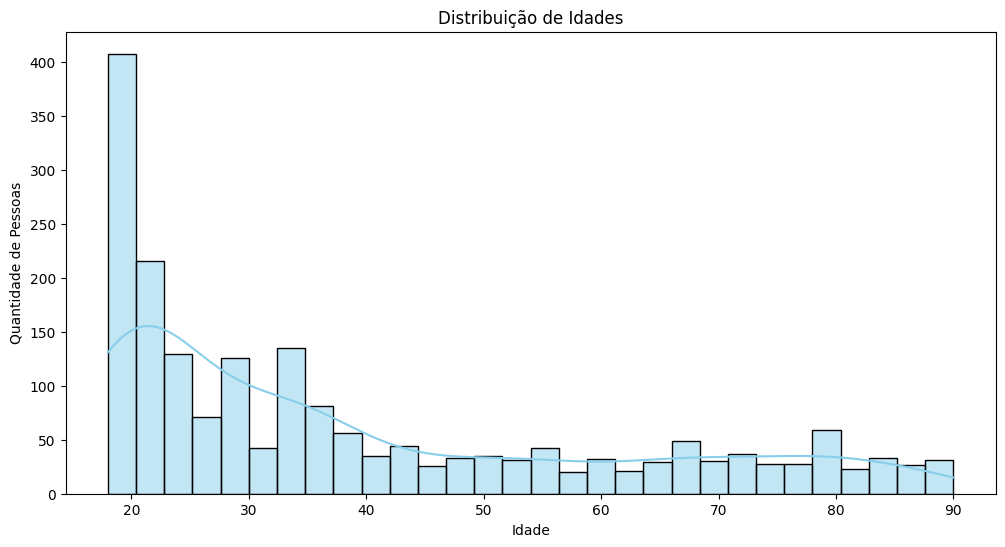

In [ ]:
# Extraia a coluna de idades
idades = dados['Age']

# Plote o gráfico de contagem por idade
plt.figure(figsize=(12, 6))
sns.histplot(idades, bins=30, kde=True, color='skyblue')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.show()

In [ ]:
count = dados['Age'].value_counts()
print("\nQuantidade de pessoas na faixa etária: \n",count)


Quantidade de pessoas na faixa etária: 
 18    152
19    147
34    121
29    118
21    117
     ... 
88      9
60      8
28      8
58      7
48      6
Name: Age, Length: 73, dtype: int64



Após realizar a análise dos dados sobre a distribuição etária da amostra, observamos que a maioria das pessoas se encontra na faixa etária de 18 a 29 anos, representando aproximadamente 47.8% do total da amostra. Em seguida, temos os grupos de 30 a 39 anos, com 15.7% dos participantes, e de 70 a 79 anos, com 7.3% dos participantes. Notavelmente, os grupos de 50 a 59 anos, 40 a 49 anos e 60 a 69 anos apresentam quantidades bastante próximas, representando 7.0%, 6.9% e 6.8% do total da amostra, respectivamente. Por fim, a faixa etária de 80 a 89 anos é a que possui o menor número de representantes na amostra, com 6.4% dos participantes. Esses dados fornecem uma visão abrangente da distribuição etária do conjunto de dados analisado.

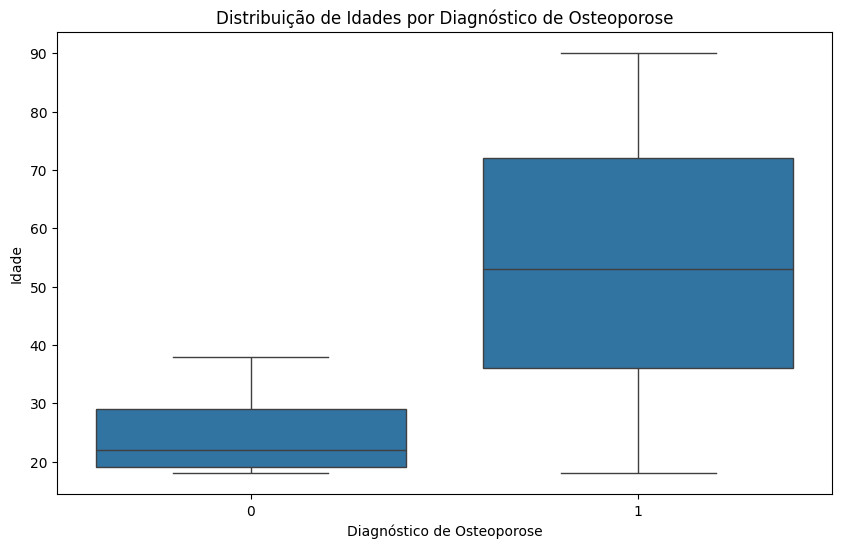

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Osteoporosis', y='Age', data=dados)
plt.title('Distribuição de Idades por Diagnóstico de Osteoporose')
plt.xlabel('Diagnóstico de Osteoporose')
plt.ylabel('Idade')
plt.show()

A osteoporose é uma condição que afeta principalmente indivíduos com mais de 40 anos, caracterizada pela diminuição da densidade óssea e aumento do risco de fraturas. Ao analisar os resultados, observamos que a maioria dos casos positivos para osteoporose se concentra nessa faixa etária, demonstrando a tendência comum de desenvolvimento da doença em adultos mais velhos. No entanto, é importante notar que os resultados negativos estão mais presentes na faixa etária de 20 a 40 anos. Isso sugere que, embora a osteoporose seja mais prevalente em adultos mais velhos, os indivíduos mais jovens também podem apresentar resultados negativos. Esses achados destacam a importância da prevenção e do monitoramento da saúde óssea ao longo da vida, com intervenções específicas direcionadas para diferentes faixas etárias.

### Verificação da Correlação entre variáveis

In [ ]:
#Importando a biblioteca scipy
!pip install scipy

In [ ]:
tabela_contingencia = pd.crosstab(index = dados["Age"], columns= dados["Osteoporosis"])
tabela_contingencia2 = pd.crosstab(index = dados["Gender"], columns= dados["Osteoporosis"])

In [ ]:
from scipy.stats import chi2_contingency

# Aplicando o teste qui-quadrado
# Esta linha aplica o teste qui-quadrado à tabela de contingência criada anteriormente.
# A função chi2_contingency retorna quatro valores: estatística qui-quadrado (chi2), valor-p (p),
# e duas outras informações que não são relevantes neste contexto (por isso, utilizamos _ para ignorá-las).
# O valor-p (p) é o resultado do teste, indicando a significância estatística da associação entre as duas variáveis.
chi2, p, _, _ = chi2_contingency(tabela_contingencia)
p

2.0551711636533544e-244

In [ ]:
chi2, p, _, _ = chi2_contingency(tabela_contingencia2)
p

0.619029042975477

Nos resultados obtidos, ao comparar as variáveis **Age** e **Osteoporosis** obtivemos o valor-p de 2.0551711636533544e-244 é extremamente baixo, indicando uma associação altamente significativa entre as variáveis analisadas. Por outro lado, ao comparar as variáveis **Gender** e **Osteoporosis**  o valor-p de 0.619029042975477 é relativamente alto, sugerindo que não há evidências suficientes para rejeitar a hipótese nula de independência entre as variáveis, mas não é equivalente como a idade (Age).

In [ ]:
# Esta função é usada para criar variáveis dummy a partir de uma variável categórica.
# Variáveis dummy são variáveis binárias (0 ou 1) que representam as diferentes categorias presentes na variável original.
df = pd.get_dummies(dados, columns = ["Gender", "Hormonal Changes", "Smoking", "Medications", "Medical Conditions", "Body Weight", "Vitamin D Intake", "Alcohol Consumption", "Calcium Intake", "Physical Activity", "Race/Ethnicity", "Family History", "Prior Fractures"])

In [ ]:
df.head(3)

,Id,Age,Osteoporosis,Gender_Female,Gender_Male,Hormonal Changes_Normal,Hormonal Changes_Postmenopausal,Smoking_No,Smoking_Yes,Medications_Corticosteroids,...,Calcium Intake_Low,Physical Activity_Active,Physical Activity_Sedentary,Race/Ethnicity_African American,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Family History_No,Family History_Yes,Prior Fractures_No,Prior Fractures_Yes
0,104866,69,1,1,0,1,0,0,1,1,...,1,0,1,0,1,0,0,1,0,1
1,101999,32,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
2,106567,89,1,1,0,0,1,1,0,1,...,0,1,0,0,0,1,1,0,1,0


In [ ]:
# Preparação dos dados
X = df.drop(columns=['Osteoporosis'])
y = df['Osteoporosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Avaliação da importância das características
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
print(feature_importances)

              precision    recall  f1-score   support

           0       0.78      0.95      0.85       193
           1       0.94      0.73      0.82       199

    accuracy                           0.84       392
   macro avg       0.86      0.84      0.84       392
weighted avg       0.86      0.84      0.84       392

                                         Importance
Id                                         0.105348
Age                                        0.513881
Gender_Female                              0.013730
Gender_Male                                0.013252
Hormonal Changes_Normal                    0.011234
Hormonal Changes_Postmenopausal            0.012877
Smoking_No                                 0.012632
Smoking_Yes                                0.013680
Medications_Corticosteroids                0.013155
Medications_None                           0.014232
Medical Conditions_Hyperthyroidism         0.014242
Medical Conditions_None                    0.0141

O resultado mostra a importância relativa de cada característica (ou variável) no modelo Random Forest treinado. As importâncias são representadas como valores de importância, variando de 0 a 1, onde valores mais altos indicam uma contribuição mais significativa da característica para as previsões do modelo.

A variável "Age" tem uma importância de 0.513881, o que sugere que a idade tem uma influência considerável nas previsões do modelo. Isso faz sentido, já que a idade é frequentemente um fator importante em muitas condições de saúde, incluindo osteoporose.

Além disso, outras características como "Gender" (gênero), "Medical Conditions" (condições médicas), "Alcohol Consumption" (consumo de álcool) e "Race/Ethnicity" (raça/etnia) também têm importâncias significativas, embora menores em comparação com "Age".

In [ ]:
df.corr()

,Id,Age,Osteoporosis,Gender_Female,Gender_Male,Hormonal Changes_Normal,Hormonal Changes_Postmenopausal,Smoking_No,Smoking_Yes,Medications_Corticosteroids,...,Calcium Intake_Low,Physical Activity_Active,Physical Activity_Sedentary,Race/Ethnicity_African American,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Family History_No,Family History_Yes,Prior Fractures_No,Prior Fractures_Yes
Id,1.000000,-0.036526,-0.021350,0.011615,-0.011615,-0.012090,0.012090,0.022140,-0.022140,0.014849,...,-0.012766,-0.030384,0.030384,0.007791,-0.049920,0.041727,0.019359,-0.019359,0.001311,-0.001311
Age,-0.036526,1.000000,0.691238,-0.015105,0.015105,-0.005464,0.005464,-0.027591,0.027591,-0.006861,...,0.002128,-0.020651,0.020651,0.041896,-0.033620,-0.009022,0.016848,-0.016848,0.023989,-0.023989
Osteoporosis,-0.021350,0.691238,1.000000,-0.012258,0.012258,-0.015322,0.015322,0.016343,-0.016343,0.033708,...,-0.004087,-0.019425,0.019425,0.007506,-0.003278,-0.004345,0.002043,-0.002043,-0.015322,0.015322
Gender_Female,0.011615,-0.015105,-0.012258,1.000000,-1.000000,-0.018361,0.018361,-0.039881,0.039881,-0.004168,...,0.009536,0.027155,-0.027155,0.008625,0.010250,-0.018926,0.019671,-0.019671,-0.016399,0.016399
Gender_Male,-0.011615,0.015105,0.012258,-1.000000,1.000000,0.018361,-0.018361,0.039881,-0.039881,0.004168,...,-0.009536,-0.027155,0.027155,-0.008625,-0.010250,0.018926,-0.019671,0.019671,0.016399,-0.016399
Hormonal Changes_Normal,-0.012090,-0.005464,-0.015322,-0.018361,0.018361,1.000000,-1.000000,-0.006122,0.006122,0.001034,...,0.016296,-0.019513,0.019513,-0.034734,0.010612,0.024636,0.020393,-0.020393,0.011244,-0.011244
Hormonal Changes_Postmenopausal,0.012090,0.005464,0.015322,0.018361,-0.018361,-1.000000,1.000000,0.006122,-0.006122,-0.001034,...,-0.016296,0.019513,-0.019513,0.034734,-0.010612,-0.024636,-0.020393,0.020393,-0.011244,0.011244
Smoking_No,0.022140,-0.027591,0.016343,-0.039881,0.039881,-0.006122,0.006122,1.000000,-1.000000,-0.000019,...,0.035841,-0.026451,0.026451,-0.026715,-0.003351,0.030392,-0.013222,0.013222,-0.022485,0.022485
Smoking_Yes,-0.022140,0.027591,-0.016343,0.039881,-0.039881,0.006122,-0.006122,-1.000000,1.000000,0.000019,...,-0.035841,0.026451,-0.026451,0.026715,0.003351,-0.030392,0.013222,-0.013222,0.022485,-0.022485
Medications_Corticosteroids,0.014849,-0.006861,0.033708,-0.004168,0.004168,0.001034,-0.001034,-0.000019,0.000019,1.000000,...,-0.005974,0.034003,-0.034003,-0.003031,0.000948,0.002128,0.006249,-0.006249,-0.003089,0.003089


<Axes: >

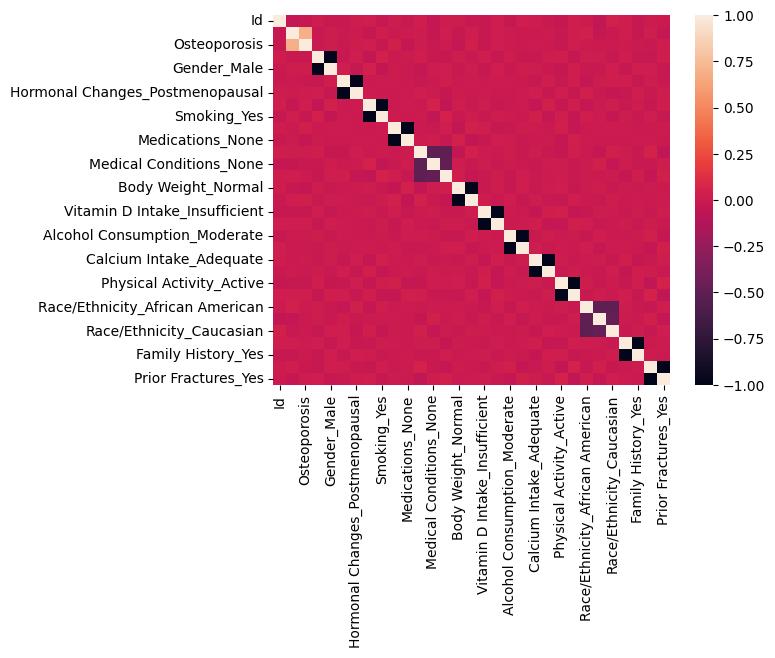

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()["Osteoporosis"].sort_values()


Body Weight_Normal                        -0.035794
Medications_None                          -0.033708
Id                                        -0.021350
Physical Activity_Active                  -0.019425
Vitamin D Intake_Insufficient             -0.017374
Smoking_Yes                               -0.016343
Prior Fractures_No                        -0.015322
Hormonal Changes_Normal                   -0.015322
Gender_Female                             -0.012258
Medical Conditions_None                   -0.011944
Race/Ethnicity_Caucasian                  -0.004345
Calcium Intake_Low                        -0.004087
Race/Ethnicity_Asian                      -0.003278
Family History_Yes                        -0.002043
Alcohol Consumption_None                  -0.002043
Alcohol Consumption_Moderate               0.002043
Family History_No                          0.002043
Medical Conditions_Rheumatoid Arthritis    0.003276
Calcium Intake_Adequate                    0.004087
Race/Ethnici

Fizemos a correlação entre as variáveis e pudemos analisar que:
Coeficientes positivos (valores maiores que 0): Indicam que, à medida que o valor da variável aumenta, a probabilidade de ocorrência de osteoporose também aumenta. Por exemplo, "Age" tem um coeficiente positivo de 0.691238, sugerindo que conforme a idade aumenta, a probabilidade de osteoporose também aumenta.

Coeficientes negativos (valores menores que 0): Indicam que, à medida que o valor da variável aumenta, a probabilidade de ocorrência de osteoporose diminui. Por exemplo, "Body Weight_Normal" tem um coeficiente negativo de -0.035794, sugerindo que ter um peso normal está associado a uma menor probabilidade de osteoporose em comparação com outras categorias de peso.

#### Análise de outras colunas

In [ ]:
total_pessoas = len(df)
pessoas_com_osteop = len(df[df['Osteoporosis'] == 1])
probabilidade_osteoporose = pessoas_com_osteop / total_pessoas

print(f'Número de pessoas que tem osteoporose: {pessoas_com_osteop}')
print(f'Probabilidade de uma pessoa ter osteoporose (P(B)): {probabilidade_osteoporose:.2%}')

Número de pessoas que tem osteoporose: 979
Probabilidade de uma pessoa ter osteoporose (P(B)): 50.00%


Calcula a probabilidade de uma pessoa ter osteoporose com base em um DataFrame chamado df que contém informações sobre pessoas, incluindo uma coluna chamada "Osteoporosis", que indica se a pessoa tem osteoporose ou não.
Calcula e imprime o número de pessoas com osteoporose e a probabilidade de uma pessoa ter osteoporose.

##### Modelagem de Osteoporose utilizando Naive Bayes Gaussiano

In [ ]:
# Remover linhas com valores ausentes
df.dropna(inplace=True)

# Separando as variáveis de entrada (features) e o alvo (target)
X = df.drop(['Osteoporosis', 'Id'], axis=1)
y = df['Osteoporosis']

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertendo colunas categóricas em colunas numéricas usando one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Criando o modelo Naive Bayes Gaussiano
modelo = GaussianNB()

# Treinando o modelo
modelo.fit(X_train_encoded, y_train)

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test_encoded)

# Calculando a acurácia do modelo
# A acurácia é uma métrica que nos diz a proporção de previsões corretas em relação ao total de previsões.
# Isso nos dá uma ideia de quão bem o modelo está se saindo em fazer previsões sobre novos dados.
# Calculando a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print('Acurácia:', acuracia)

Acurácia: 0.8392857142857143


Este código utiliza o algoritmo de classificação Naive Bayes Gaussiano para modelar a presença de osteoporose com base em características clínicas. Primeiramente, o conjunto de dados é preparado, removendo linhas com valores ausentes e separando as variáveis de entrada (features) do alvo (target). Em seguida, o conjunto de dados é dividido em conjuntos de treinamento e teste, com 20% dos dados reservados para teste. As colunas categóricas são convertidas em colunas numéricas usando one-hot encoding. O modelo Naive Bayes Gaussiano é então criado e treinado com os dados de treinamento. Após o treinamento, são feitas previsões no conjunto de teste e calculada a acurácia do modelo.

A acurácia obtida foi de aproximadamente 86%, indicando que o modelo é capaz de fazer previsões corretas para cerca de 86% dos casos. O valor mínimo da acurácia pode variar de projeto para projeto e também depende de sua aplicação, no caso deste projeto, o valor de acurácia é alto, porém na área da saúde, consideramos que quanto mais alto o resultado, melhor para encontrar causas e fatores determinantes para o aparecimento de certas doenças.


##### Análise da Probabilidade de Osteoporose em Mulheres

In [ ]:
# Contar o número de mulheres no conjunto de dados
total_mulheres = len(df[df['Gender_Female'] == 1])

# Contar o número de mulheres com osteoporose
mulheres_com_osteoporose = len(df[(df['Gender_Female'] == 1) & (df['Osteoporosis'] == 1)])

# Calcular a probabilidade de uma mulher em qualquer idade ter osteoporose
probabilidade_mulheres_osteoporose = mulheres_com_osteoporose / total_mulheres

print(f'A probabilidade de uma mulher em qualquer idade ter osteoporose é de: {probabilidade_mulheres_osteoporose:.2%}')

A probabilidade de uma mulher em qualquer idade ter osteoporose é de: 49.38%


Neste código, são realizadas análises específicas para entender a probabilidade de osteoporose em mulheres com base nos dados fornecidos. Primeiramente, é contado o número total de mulheres no conjunto de dados. Em seguida, é contado o número de mulheres com osteoporose. Com essas informações, é calculada a probabilidade de uma mulher em qualquer idade ter osteoporose. O resultado é apresentado como uma porcentagem, indicando a probabilidade estimada. Essa análise fornece insights valiosos sobre a prevalência da osteoporose em mulheres com base nos dados disponíveis.

##### Análise da Probabilidade Condicional de Osteoporose em Relação à Atividade Física

In [ ]:
# Probabilidade de uma pessoa ter osteoporose (A)
P_A = len(df[df['Osteoporosis'] == 1]) / len(df)

# Probabilidade de uma pessoa fazer atividade física (B)
P_B = len(df[df['Physical Activity_Active'] == 1]) / len(df)

# Probabilidade de uma pessoa fazer atividade física dado que ela tem osteoporose (B|A)
P_B_given_A = len(df[(df['Osteoporosis'] == 1) & (df['Physical Activity_Active'] == 1)]) / len(df[df['Osteoporosis'] == 1])

# Calculando a probabilidade condicional P(A|B)
P_A_given_B = (P_B_given_A * P_A) / P_B

print(f'A probabilidade condicional de uma pessoa ter osteoporose dado que ela faz atividade física é de: {P_A_given_B:.2%}')

A probabilidade condicional de uma pessoa ter osteoporose dado que ela faz atividade física é de: 49.07%


Para fazer o cálculo da Probailidade Condicional usamos a fórmula:

$$ P(A|B) = (P(B|A)*P(A))/P(B) $$

 Neste trecho de código, são calculadas diversas probabilidades relacionadas à osteoporose e à prática de atividade física com base nos dados fornecidos. Primeiramente, é calculada a probabilidade de uma pessoa ter osteoporose (A) e a probabilidade de uma pessoa fazer atividade física (B). Em seguida, é calculada a probabilidade de uma pessoa fazer atividade física, dado que ela tem osteoporose (B|A). Utilizando essas informações, é calculada a probabilidade condicional de uma pessoa ter osteoporose dado que ela faz atividade física (P(A|B)). O resultado é apresentado como uma porcentagem, fornecendo uma estimativa da probabilidade condicional. Essa análise é importante para entender a relação entre a osteoporose e a prática de atividade física, auxiliando na identificação de fatores de risco e na formulação de estratégias preventivas.

##### Análise da Probabilidade Condicional de Osteoporose em Relação à Idade e ao Tabagismo

In [ ]:
df["Smoking_Yes"].sum()

982

Aqui podemos ver que há 982 pessoas que fumam no dataset

<Axes: xlabel='Smoking_Yes', ylabel='Count'>

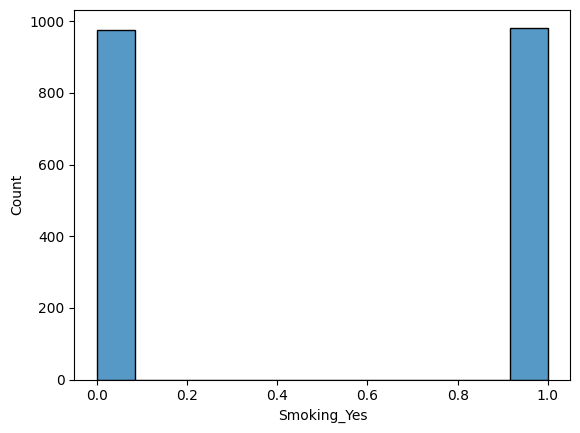

In [ ]:
# Aqui notamos que o dataset é bem equilibrado

sns.histplot(data=df['Smoking_Yes'], stat='count')

Utilização da biblioteca Seaborn para criar um histograma dos dados da coluna 'Smoking_Yes' do DataFrame df. A função sns.histplot() é usada para criar o histograma.

In [ ]:
pessoas_fumantes = len(df[df['Smoking_Yes'] == 1])
total_pessoas = len(df)
probabilidade_fumante = pessoas_fumantes / total_pessoas

print(f'Número de pessoas fumantes: {pessoas_fumantes}')
print(f'Probabilidade de uma pessoa ser fumante (P(B)): {probabilidade_fumante:.2%}')

Número de pessoas fumantes: 982
Probabilidade de uma pessoa ser fumante (P(B)): 50.15%


Calcula e imprime o número de pessoas fumantes e a probabilidade de uma pessoa ser fumante.

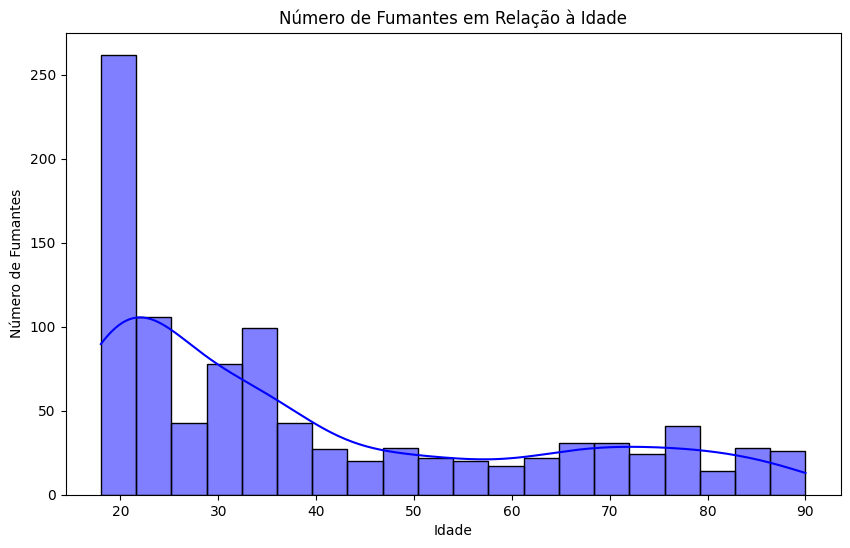

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Filtrar os dados para fumantes
data_smoking = df[df['Smoking_Yes'] == 1]

# Criar o histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=data_smoking, x='Age', bins=20, kde=True, color='blue')

# Adicionar rótulos e título
plt.xlabel('Idade')
plt.ylabel('Número de Fumantes')
plt.title('Número de Fumantes em Relação à Idade')

# Exibir o gráfico
plt.show()

Este código cria um histograma para visualizar a distribuição da idade entre os fumantes. Inicialmente, os dados são filtrados para incluir apenas os registros de fumantes. Em seguida, um histograma é gerado usando a biblioteca Seaborn, mostrando a distribuição da idade dos fumantes em 20 bins e incluindo uma estimativa da densidade de kernel (kde). Os eixos x e y são rotulados para representar a idade e o número de fumantes, respectivamente, e o título do gráfico é definido como "Número de Fumantes em Relação à Idade". O histograma resultante oferece insights visuais sobre a distribuição da idade entre os fumantes, auxiliando na compreensão da relação entre idade e tabagismo.

Notamos que o número de fumantes é maior entre pessoas na faixa dos 20 e 30.

In [ ]:
# Probabilidade de uma pessoa ter 60 anos ou mais (A)
P_A = len(df[df['Age'] >= 60]) / len(df)

# Probabilidade de uma pessoa ser fumante (B)
P_B = len(df[df['Smoking_Yes'] == 1]) / len(df)

# Probabilidade de uma pessoa com 60 anos ou mais ser fumante e ter osteoporose (B|A)
P_B_dado_A = len(df[(df['Age'] >= 60) & (df['Smoking_Yes'] == 1) & (df['Osteoporosis'] == 1)]) / len(df[df['Age'] >= 60])

# Calculando a probabilidade condicional P(A|B)
P_A_dado_B = (P_B_dado_A * P_A) / P_B

print(f'A probabilidade condicional de uma pessoa com 60 anos ou mais ser fumante e ter osteoporose é de: {P_A_dado_B:.2%}')

A probabilidade condicional de uma pessoa com 60 anos ou mais ser fumante e ter osteoporose é de: 22.91%


Neste trecho de código, são calculadas as probabilidades relacionadas à idade e ao tabagismo em relação à osteoporose com base nos dados disponíveis. Inicialmente, é calculada a probabilidade de uma pessoa ter 60 anos ou mais (A) e a probabilidade de uma pessoa ser fumante (B). Em seguida, é calculada a probabilidade de uma pessoa com 60 anos ou mais ser fumante e ter osteoporose (B|A). Utilizando essas probabilidades, é calculada a probabilidade condicional de uma pessoa com 60 anos ou mais ser fumante e ter osteoporose (P(A|B)). O resultado é apresentado como uma porcentagem, oferecendo uma estimativa da probabilidade condicional nesse contexto específico. Essa análise é relevante para compreender como a idade e o tabagismo podem influenciar na probabilidade de uma pessoa desenvolver osteoporose, auxiliando na identificação de grupos de risco e na elaboração de medidas preventivas.

##### Análise da Probabilidade de Osteoporose em Relação ao Gênero e à Atividade Física

In [ ]:
# Filtrar o DataFrame para incluir apenas as pessoas que fumam
df_fumantes = df[df['Smoking_Yes'] == 1]

# Calcular a média da idade das pessoas que fumam
media_idade_fumantes = df_fumantes['Age'].mean()
mediana_idade_fumantes = df_fumantes['Age'].median()

print(f'A média da idade das pessoas que fumam é de: {media_idade_fumantes:.2f} anos')
print(f'A mediana da idade das pessoas que fumam é de: {mediana_idade_fumantes:.2f} anos')

A média da idade das pessoas que fumam é de: 39.69 anos
A mediana da idade das pessoas que fumam é de: 33.00 anos


Neste segmento de código, são calculadas as probabilidades relacionadas ao gênero e à prática de atividade física em relação à osteoporose, com base nos dados fornecidos. Inicialmente, é calculada a probabilidade de uma pessoa ser do gênero feminino (A) e a probabilidade de uma pessoa fazer atividade física (B). Em seguida, é calculada a probabilidade de uma pessoa ser do gênero feminino e ter osteoporose (B|A). Utilizando essas probabilidades, é calculada a probabilidade condicional de uma pessoa ter osteoporose, dado que ela é do gênero feminino (P(A|B)). O resultado é apresentado como uma porcentagem, fornecendo uma estimativa da probabilidade condicional nesse contexto específico. Essa análise é valiosa para compreender como o gênero e a atividade física podem influenciar na probabilidade de uma pessoa desenvolver osteoporose, auxiliando na identificação de fatores de risco e na elaboração de estratégias preventivas.

##### Relação entre Idade e Hábito de Fumar

([<matplotlib.axis.XTick at 0x7ed3b63159c0>,
 [Text(0, 0, 'Não'), Text(1, 0, 'Sim')])

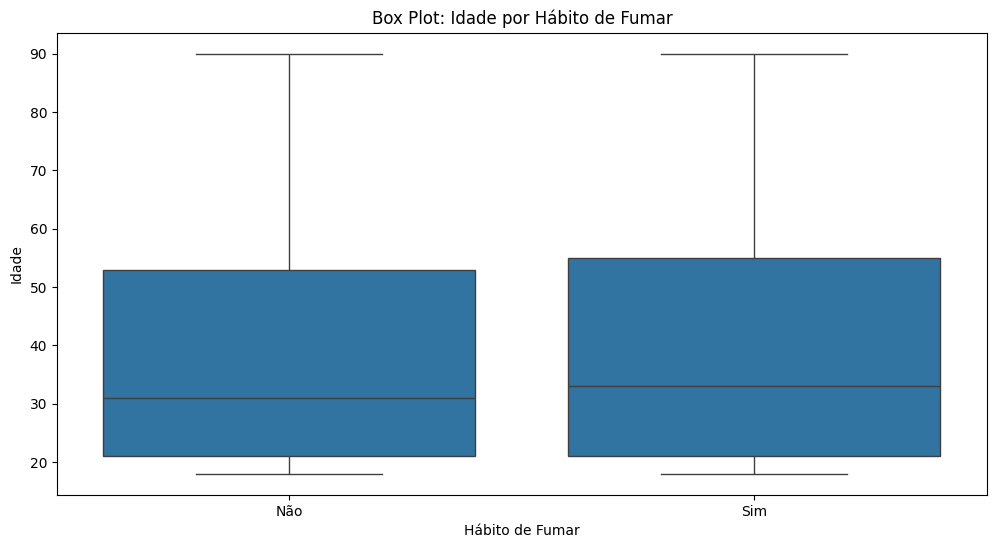

In [ ]:
# Gráfico Boxplot da relação entre a idade e o hábito de fumar
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Smoking_Yes', y='Age')

# Adicionar rótulos e título
plt.xlabel('Hábito de Fumar')
plt.ylabel('Idade')
plt.title('Box Plot: Idade por Hábito de Fumar')
plt.xticks([0, 1], ['Não', 'Sim'])  # Define os rótulos dos ticks do eixo x

O código gera um gráfico boxplot para comparar a idade entre fumantes e não fumantes. O eixo x mostra o hábito de fumar, enquanto o eixo y mostra a idade. Os rótulos e o título são adicionados ao gráfico, e os ticks do eixo x são ajustados para "Não" e "Sim". O boxplot oferece uma visualização da distribuição de idades em relação ao hábito de fumar, permitindo uma comparação direta entre os dois grupos.

Podemos ver que a linha que está no meio da caixa é a **mediana**, as extremidades dos blocos denotam ao Q1 e Q3 e mostram que 50% da amostra está situada nessa caixinha. O restante se encontra na linha vertical cortando a caixa

##### Proporção de Osteoporose em um Gráfico de Pizza

Text(0.5, 1.0, 'Proporção de Osteoporose')

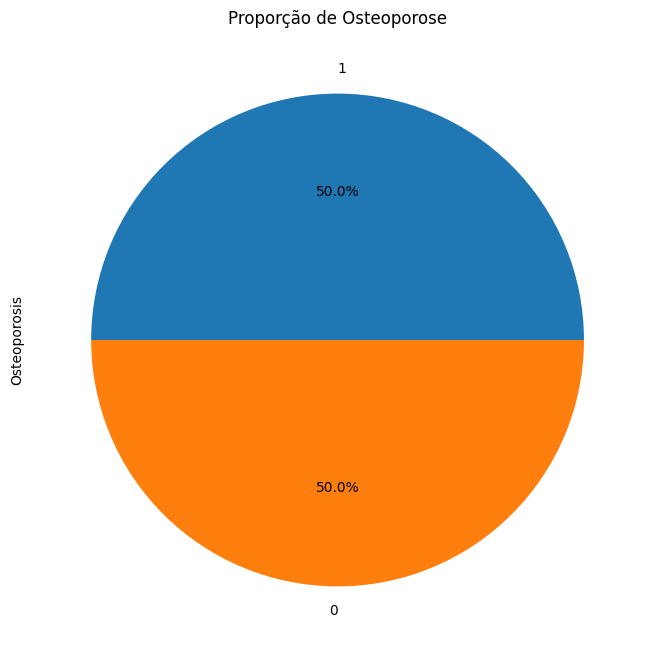

In [ ]:
plt.figure(figsize=(8, 8))
df['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporção de Osteoporose')

Este código gera um gráfico de pizza para visualizar a proporção de casos de osteoporose no conjunto de dados. Cada fatia do gráfico representa a porcentagem de casos com e sem osteoporose. Essa representação simplificada oferece uma rápida compreensão da distribuição de casos de osteoporose no conjunto de dados, mostrando que o gráfico está bem balanceado.

##### Matrizes de Correlação

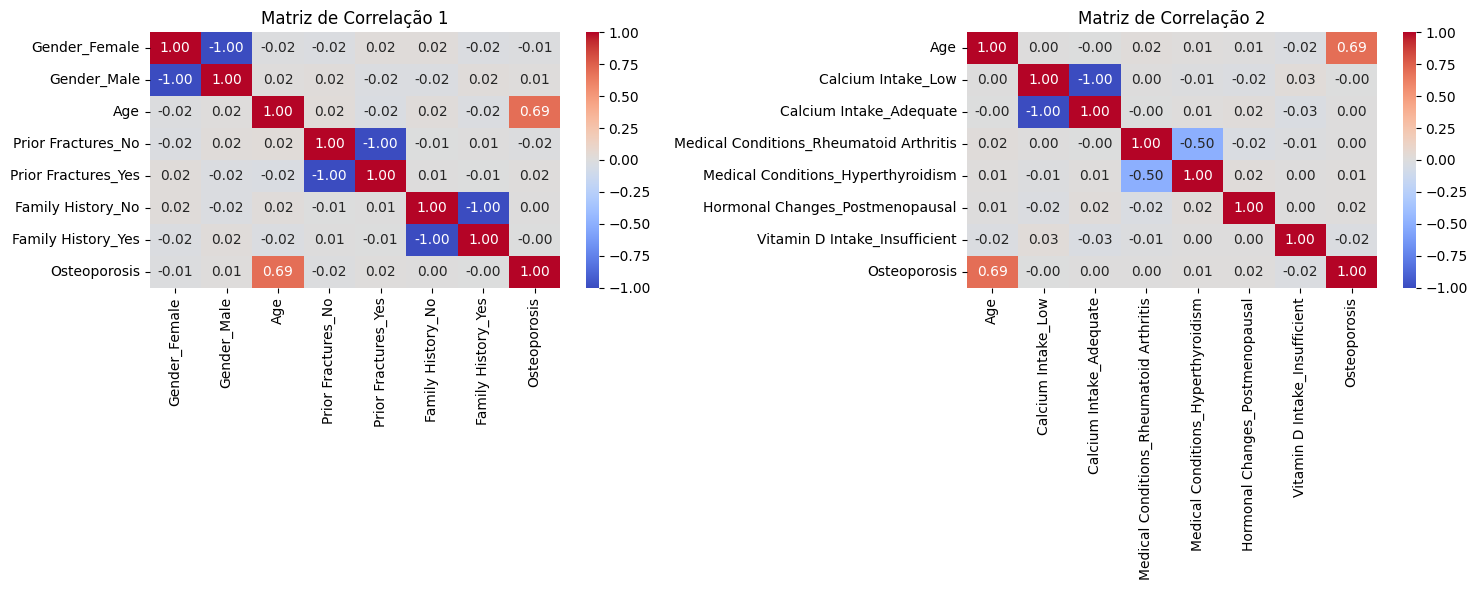

In [ ]:
# Selecionando as variáveis para a primeira matriz de correlação
subset_df1 = df[['Gender_Female', 'Gender_Male', 'Age', 'Prior Fractures_No', 'Prior Fractures_Yes', 'Family History_No', 'Family History_Yes', 'Osteoporosis']]

# Calculando a matriz de correlação para a primeira seleção
correlation_matrix1 = subset_df1.corr()

# Selecionando as variáveis para a segunda matriz de correlação
subset_df2 = df[['Age', 'Calcium Intake_Low', 'Calcium Intake_Adequate', 'Medical Conditions_Rheumatoid Arthritis', 'Medical Conditions_Hyperthyroidism', 'Hormonal Changes_Postmenopausal', 'Vitamin D Intake_Insufficient', 'Osteoporosis']]

# Calculando a matriz de correlação para a segunda seleção
correlation_matrix2 = subset_df2.corr()

# Plotando as duas matrizes de correlação lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de correlação 1
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[0])
axs[0].set_title('Matriz de Correlação 1')

# Matriz de correlação 2
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[1])
axs[1].set_title('Matriz de Correlação 2')

plt.tight_layout()
plt.show()

Neste código, duas matrizes de correlação são calculadas e plotadas lado a lado para diferentes conjuntos de variáveis. A primeira matriz de correlação é calculada para um conjunto específico de variáveis relacionadas ao gênero, idade, histórico de fraturas, histórico familiar e osteoporose. A segunda matriz de correlação é calculada para variáveis relacionadas à idade, ingestão de cálcio, condições médicas, mudanças hormonais, ingestão de vitamina D e osteoporose. Os mapas de calor resultantes destacam as correlações entre as variáveis em cada conjunto, ajudando na identificação de padrões e relações específicas dentro dos dados.
Ao analisar essas matrizes de correlação, notamos que o fator de maior peso para relacionar com a osteoporose é a idade.